<H1> Geo-spatial Data Analysis</H1>


In [114]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [115]:
countries=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21216\537976321.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

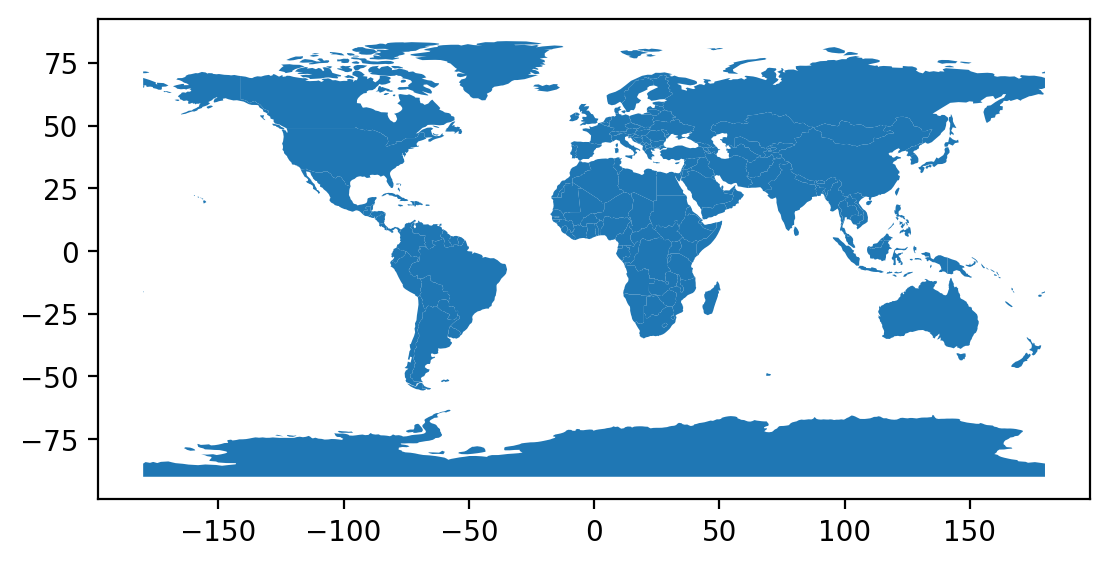

In [116]:
countries.plot()

In [117]:
countries.name

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object

In [118]:
countries.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

<Axes: >

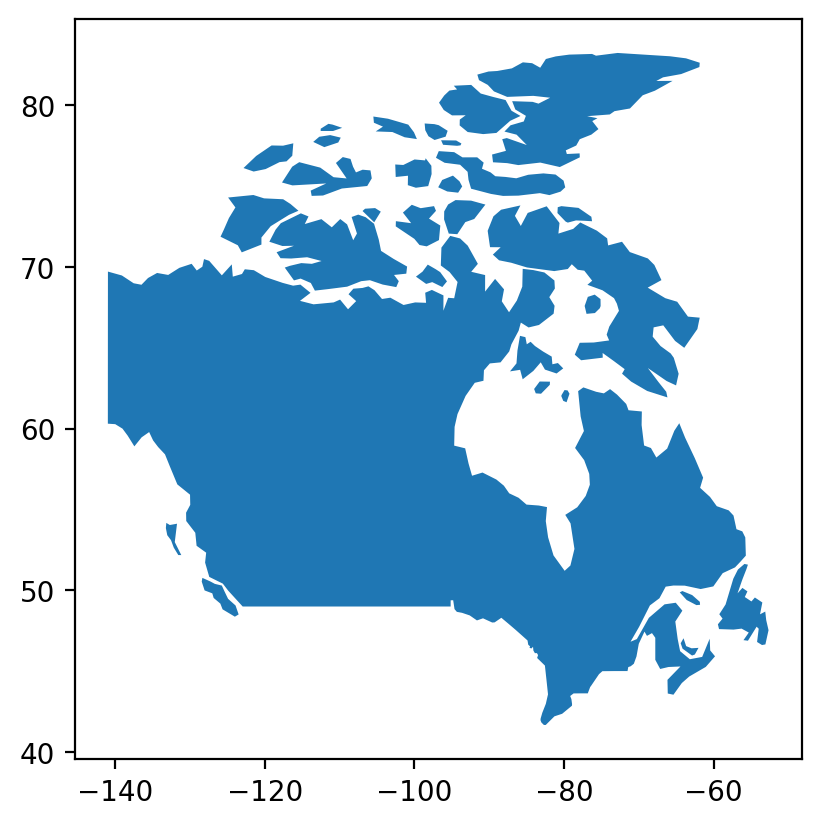

In [119]:
countries.loc[countries['name']=='Canada'].plot()

<Axes: >

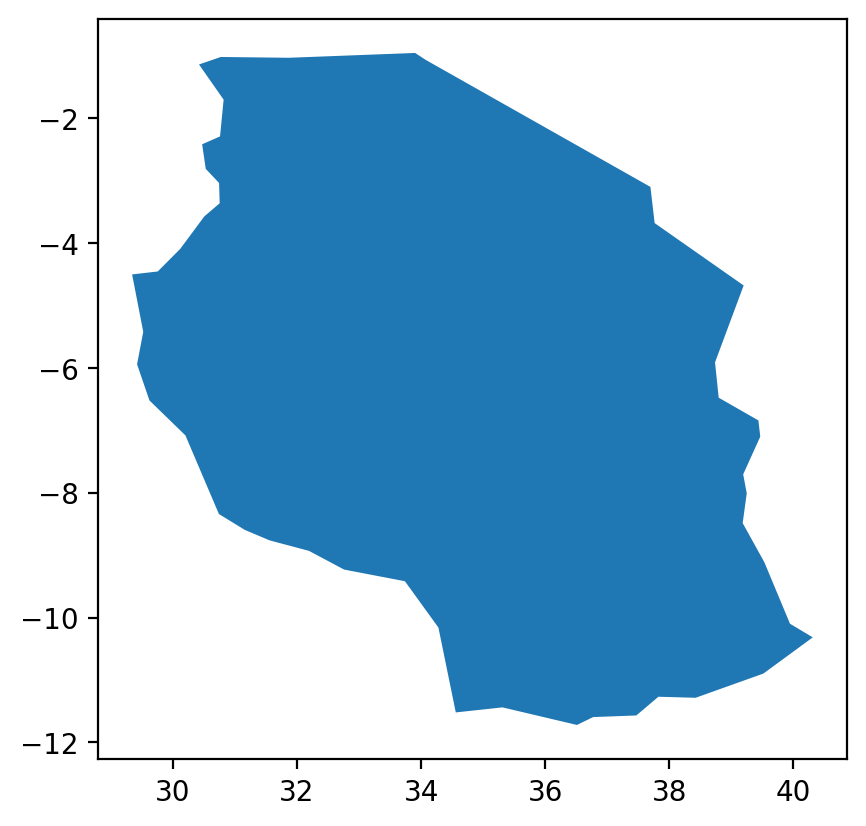

In [120]:
countries.loc[countries['name']=='Tanzania'].plot()

In [122]:
m=folium.Map([15.8700,100.9925],zoom_start=6,tiles='Stamen Terrain')
folium.GeoJson(countries.to_json()).add_to(m)
m

In [124]:
my_map=folium.Map(location=[20.5236,81.6750],
                 zoom_start=12,
                 tiles='Stamen Terrain')

basemaps={
    'Google Maps': folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&&z={z}',
    attr='Google',
    name='Google Maps',
    overlay=True,
    control=True),
    
    'Google Satellite': folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&&z={z}',
    attr='Google',
    name='Google Satellite',
    overlay=True,
    control=True),
    
    'Google Terrain': folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&&z={z}',
    attr='Google',
    name='Google Terrain',
    overlay=True,
    control=True),
    
    'Google Satellite Hybrid': folium.TileLayer(
    tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&&z={z}',
    attr='Google',
    name='Google Satellite',
    overlay=True,
    control=True),
    
    'Esri Satellite': folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Esri Satellite',
    overlay=True,
    control=True),
}

basemaps['Esri Satellite'].add_to(my_map)
my_map

### Point Data

In [125]:
cities=gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
cities.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21216\2458372536.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


<Axes: >

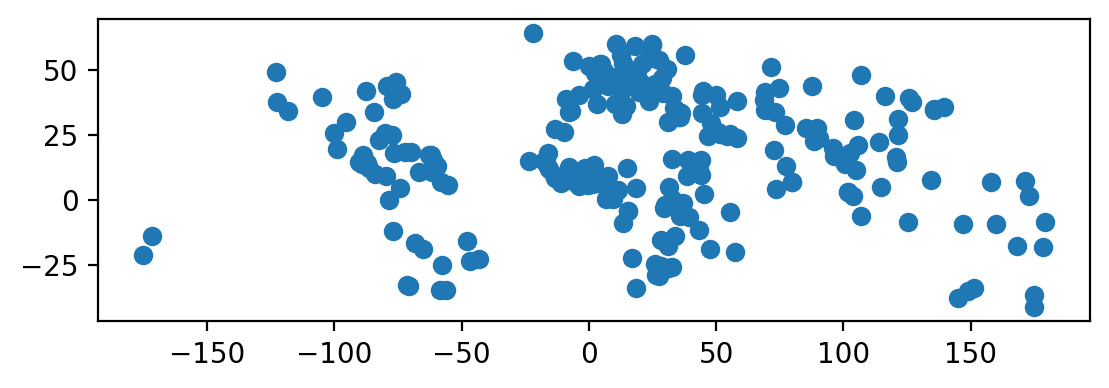

In [126]:
cities.plot()

<Axes: >

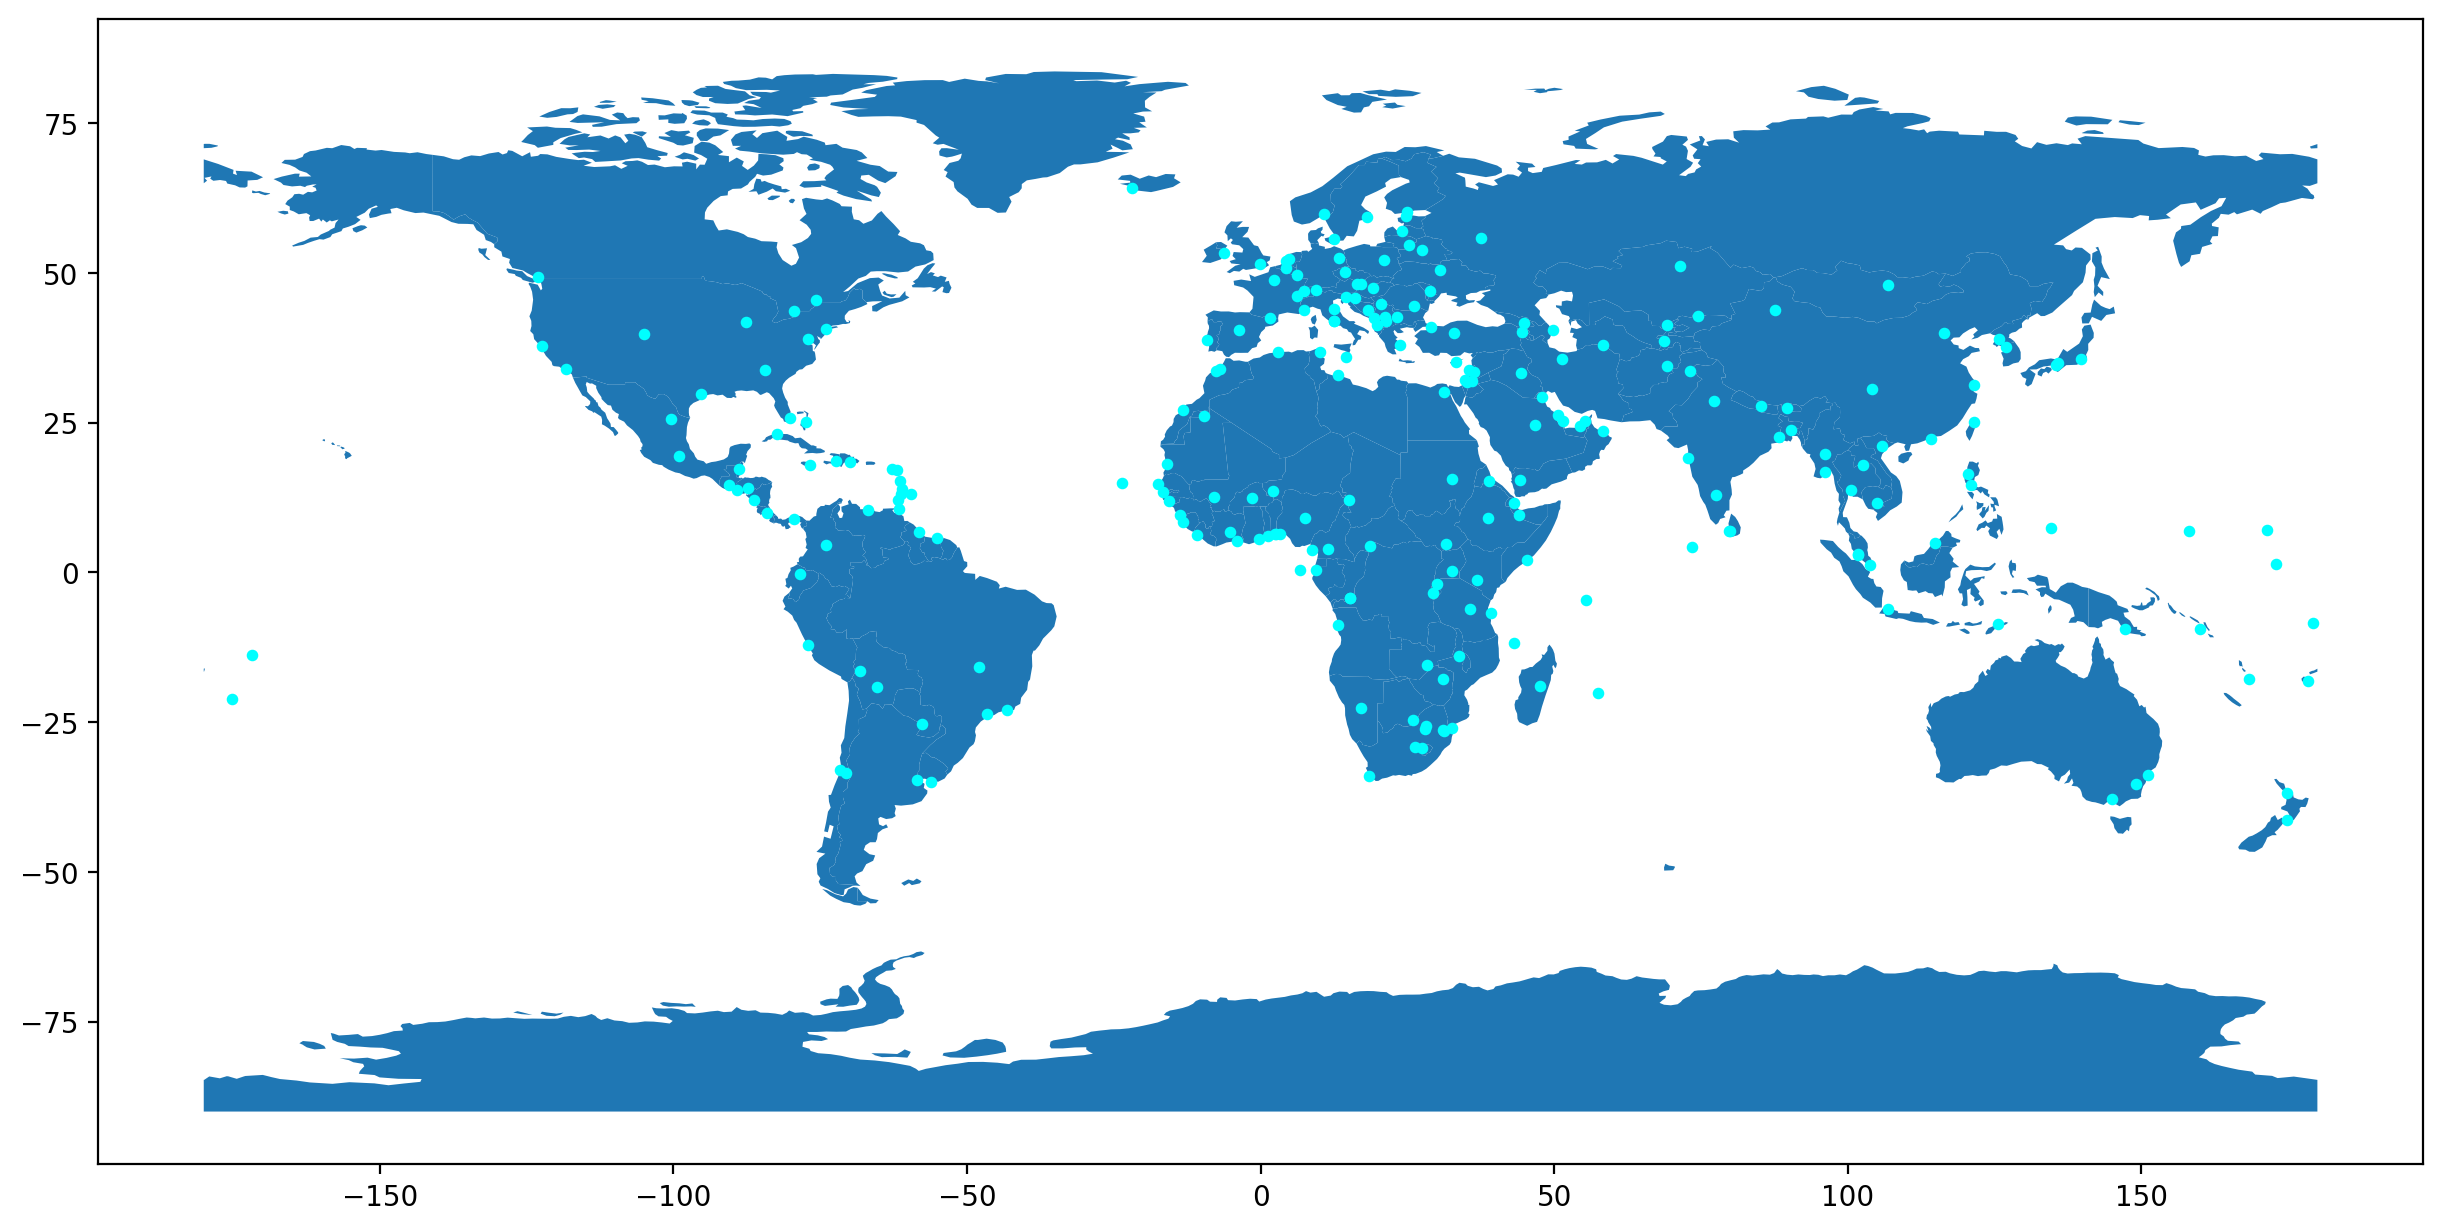

In [127]:
ax = countries.plot(figsize=(15,15))
cities.plot(ax=ax,color='cyan',markersize=10)

In [129]:
m=folium.Map([20.5937,78.9629],zoom_start=6,tiles='Stamen Toner') #Stamen Toner
folium.GeoJson(cities.to_json()).add_to(m)
m

In [130]:
long=cities.geometry.x
long

0       12.453387
1       12.441770
2        9.516670
3       31.199997
4        6.130003
          ...    
238    -43.212117
239    -46.626966
240    151.212548
241    103.853875
242    114.183064
Length: 243, dtype: float64

In [131]:
lat=cities.geometry.y
lat

0      41.903282
1      43.936096
2      47.133724
3     -26.466667
4      49.611660
         ...    
238   -22.907308
239   -23.556734
240   -33.871373
241     1.294979
242    22.306927
Length: 243, dtype: float64

In [132]:
cities['long']=long
cities['lat']=lat
cities['size']=1
cities.head()

,name,geometry,long,lat,size
0,Vatican City,POINT (12.45339 41.90328),12.453387,41.903282,1
1,San Marino,POINT (12.44177 43.93610),12.441770,43.936096,1
2,Vaduz,POINT (9.51667 47.13372),9.516670,47.133724,1
3,Lobamba,POINT (31.20000 -26.46667),31.199997,-26.466667,1
4,Luxembourg,POINT (6.13000 49.61166),6.130003,49.611660,1


In [133]:
import plotly.express as px
fig=px.scatter_mapbox(cities,lat="lat",lon="long",hover_name="name",hover_data=["name"],
                     color="name", zoom=1, height=600, 
                      size="size", 
                      opacity=0.8, width=1300)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(title_text="Cities")
fig.show()

<Axes: >

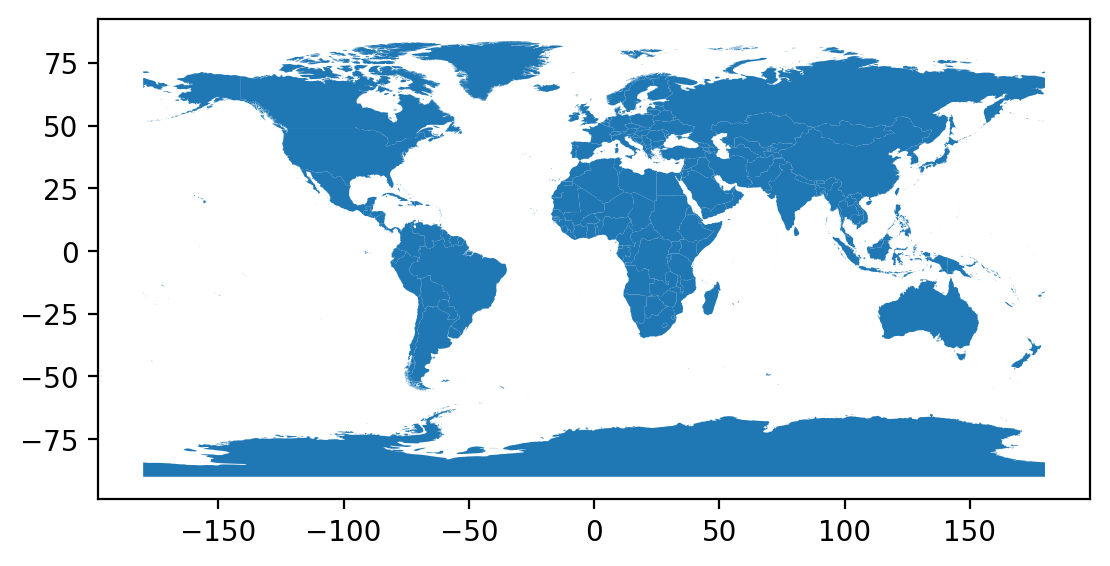

In [134]:
worlddata=gpd.read_file('S:/DataScience/Datahour/Data/world.shp')
worlddata.plot()

In [135]:
worlddata.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [136]:
worlddata=worlddata[["NAME","LON","LAT","geometry"]]

In [137]:
worlddata.head()

,NAME,LON,LAT,geometry
0,Antigua and Barbuda,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


### Calculating Area of Each Country

In [138]:
worlddata["area"]=worlddata.area

C:\Users\DELL\AppData\Local\Temp\ipykernel_21216\1193730006.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
worlddata.head()

,NAME,LON,LAT,geometry,area
0,Antigua and Barbuda,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0.046183
1,Algeria,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",213.512502
2,Azerbaijan,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",9.100912
3,Albania,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",3.075918
4,Armenia,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",3.142093


### Removing a Regeon from Dataframe

In [140]:
worlddata=worlddata[worlddata["NAME"]!='Antarctica']

<Axes: >

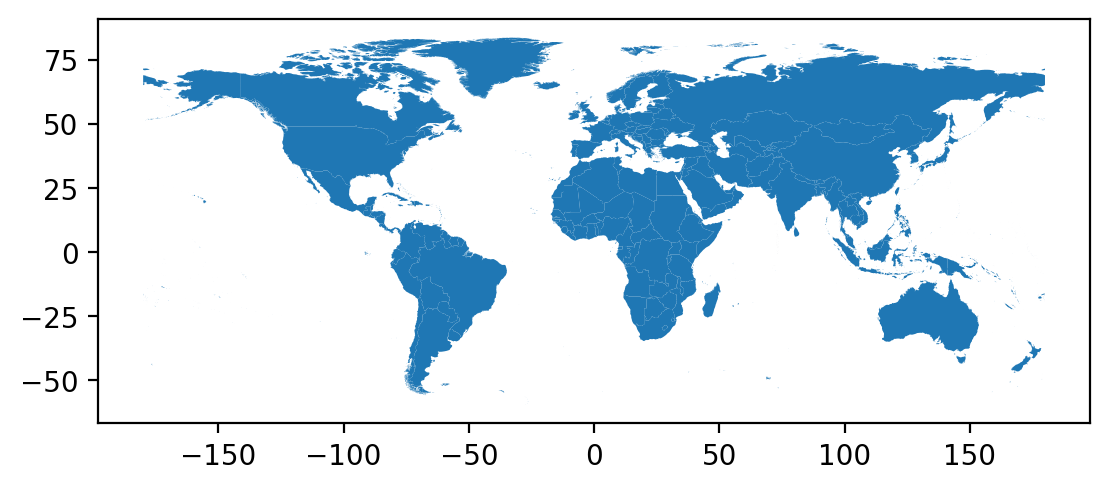

In [141]:
worlddata.plot()

### Changing the Projections- Coordinate Reference System CRS

In [144]:
current_crs=worlddata.crs
current_crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [145]:
worlddata.to_crs(epsg=3857, inplace=True)

In [146]:
current_crs=worlddata.crs
current_crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [147]:
worlddata.head()

,NAME,LON,LAT,geometry,area
0,Antigua and Barbuda,-61.783,17.078,"MULTIPOLYGON (((-6866928.470 1923670.302, -687...",0.046183
1,Algeria,2.632,28.163,"POLYGON ((329907.556 4411573.988, 331886.705 4...",213.512502
2,Azerbaijan,47.395,40.430,"MULTIPOLYGON (((5018652.337 4832292.097, 50390...",9.100912
3,Albania,20.068,41.143,"POLYGON ((2163629.445 5015449.243, 2165225.767...",3.075918
4,Armenia,44.563,40.534,"MULTIPOLYGON (((5073168.831 4958283.927, 50682...",3.142093


<Axes: >

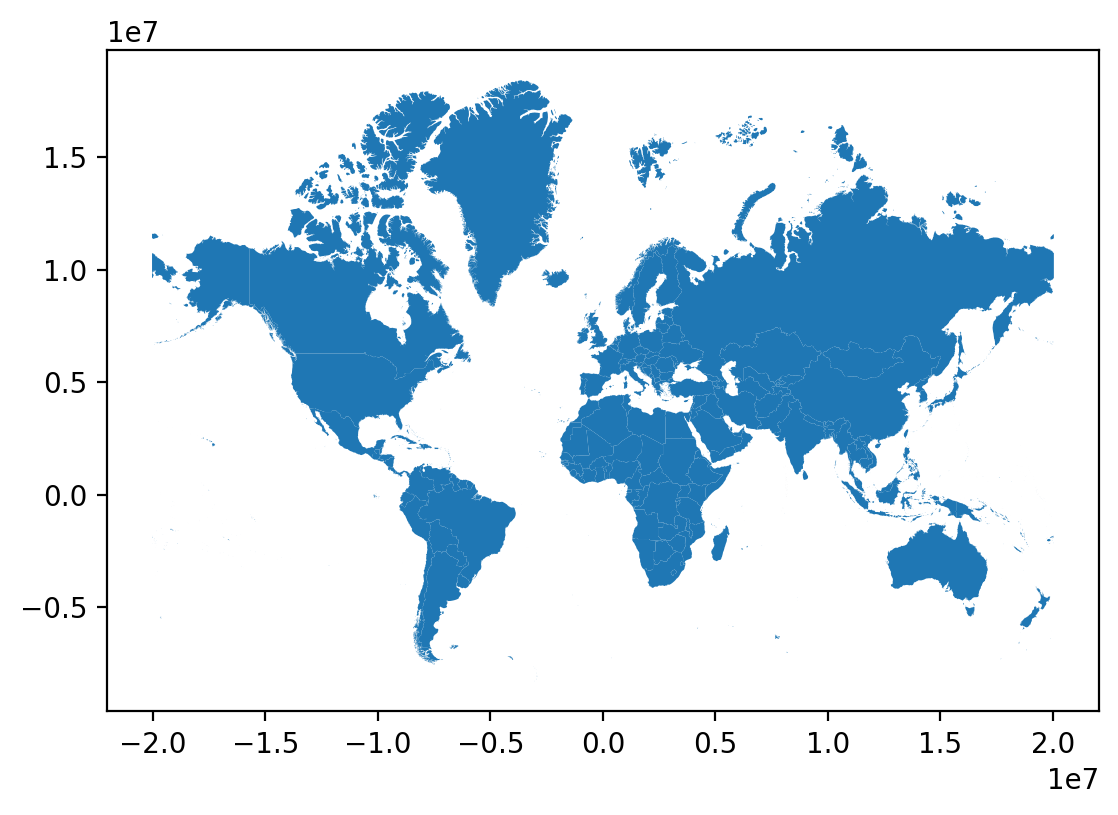

In [148]:
worlddata.plot()

### Color each country

<Axes: >

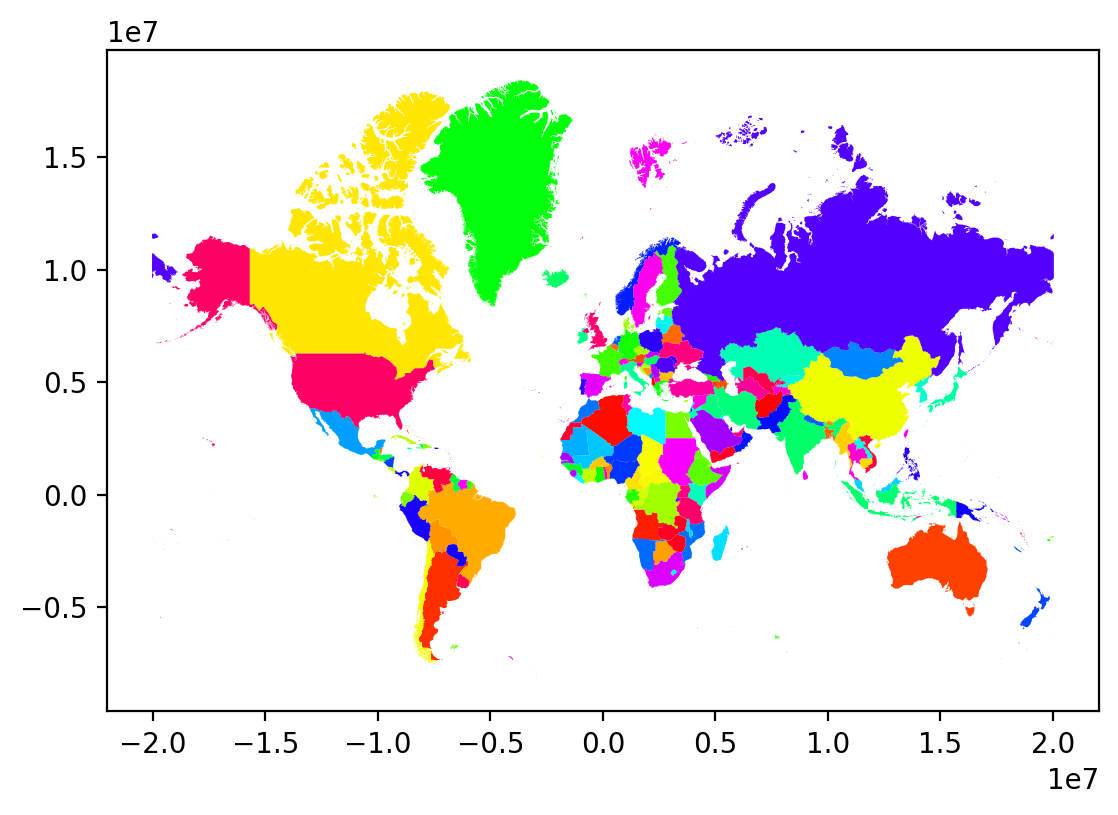

In [149]:
worlddata.plot(column="NAME", cmap="hsv")

### Calculate the area in Sq.Km

In [150]:
worlddata["area"]=worlddata.area/1000000

In [151]:
worlddata.head()

,NAME,LON,LAT,geometry,area
0,Antigua and Barbuda,-61.783,17.078,"MULTIPOLYGON (((-6866928.470 1923670.302, -687...",5.993606e+02
1,Algeria,2.632,28.163,"POLYGON ((329907.556 4411573.988, 331886.705 4...",3.014479e+06
2,Azerbaijan,47.395,40.430,"MULTIPOLYGON (((5018652.337 4832292.097, 50390...",1.478874e+05
3,Albania,20.068,41.143,"POLYGON ((2163629.445 5015449.243, 2165225.767...",5.062603e+04
4,Armenia,44.563,40.534,"MULTIPOLYGON (((5073168.831 4958283.927, 50682...",5.104906e+04


### Adding a legend

<Axes: >

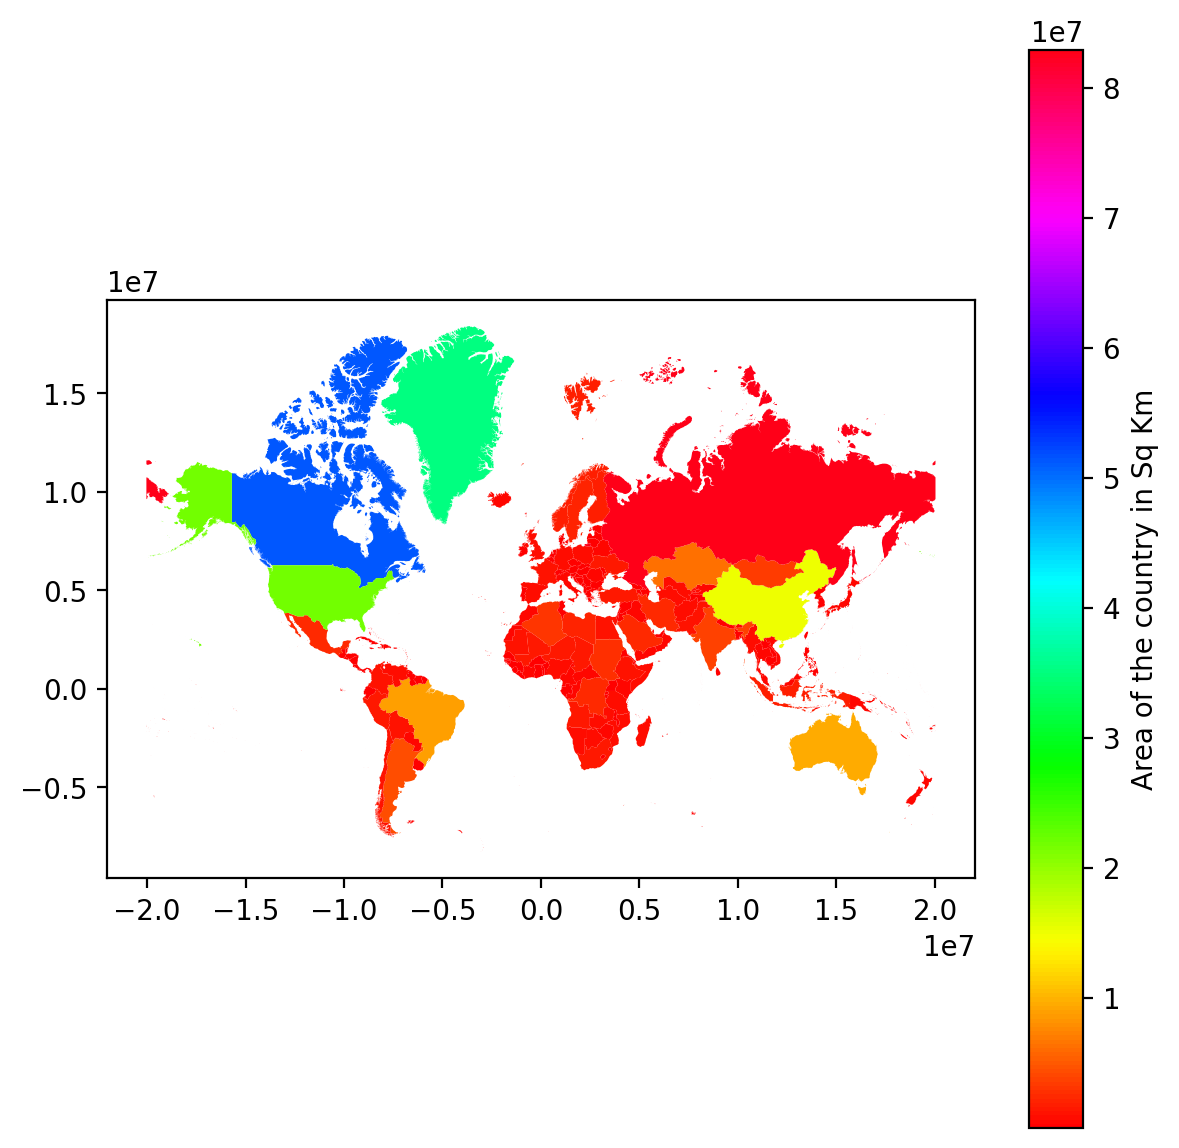

In [152]:
worlddata.plot(column="area",cmap="hsv",legend=True, legend_kwds={'label':'Area of the country in Sq Km'},
               figsize=(7,7))

In [153]:
sa1=gpd.read_file(r"S:\DataScience\Datahour\Data\Study_Area_1.shp")
sa2=gpd.read_file(r"S:\DataScience\Datahour\Data\Study_Area_2.shp")
river=gpd.read_file(r"S:\DataScience\Datahour\Data\river.shp")

In [156]:
river.head()

,id,geometry
0,1,"LINESTRING (101.50991 4.56638, 101.50335 4.548..."


<Axes: >

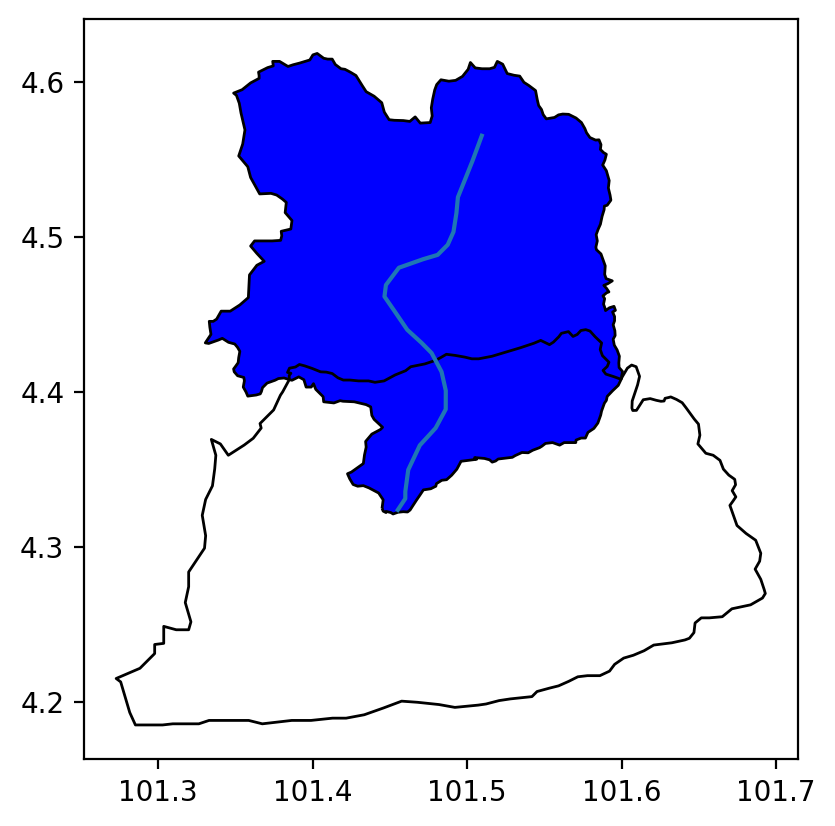

In [159]:
fig, ax =plt.subplots()
sa1.plot(ax=ax, color='blue',edgecolor='black')
sa2.plot(ax=ax,color='none',edgecolor='black')
river.plot(ax=ax)


### Intersection of Polygons

<Axes: >

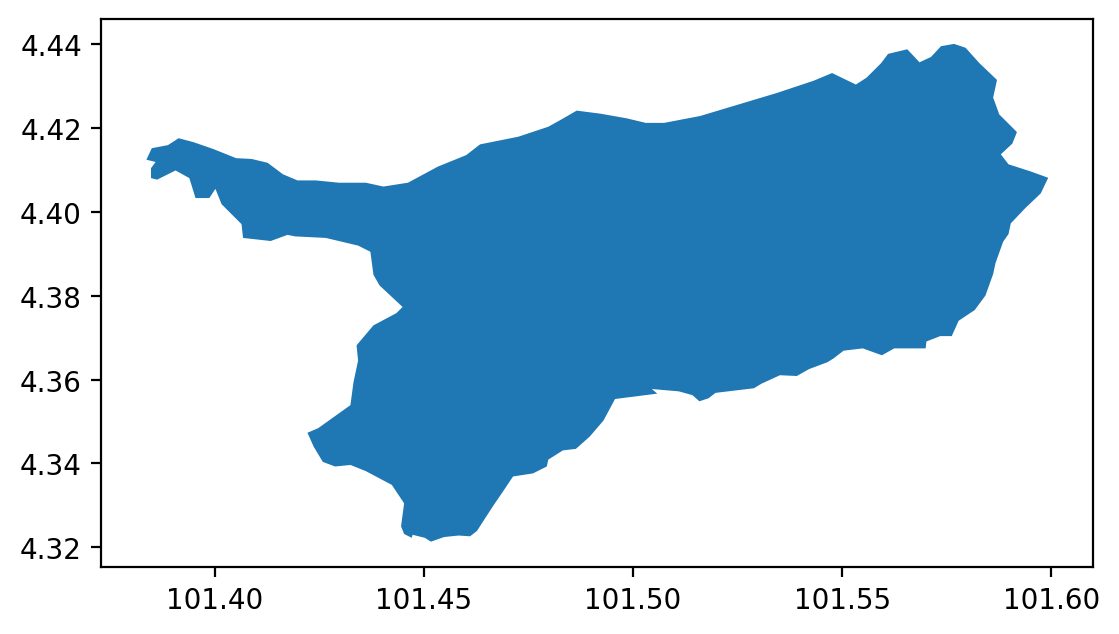

In [160]:
inter=gpd.overlay(sa1,sa2,how='intersection')
inter.plot()

### Union of Polygons

In [163]:
inter.head()

,desc_1,desc_2,geometry
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488..."


<Axes: >

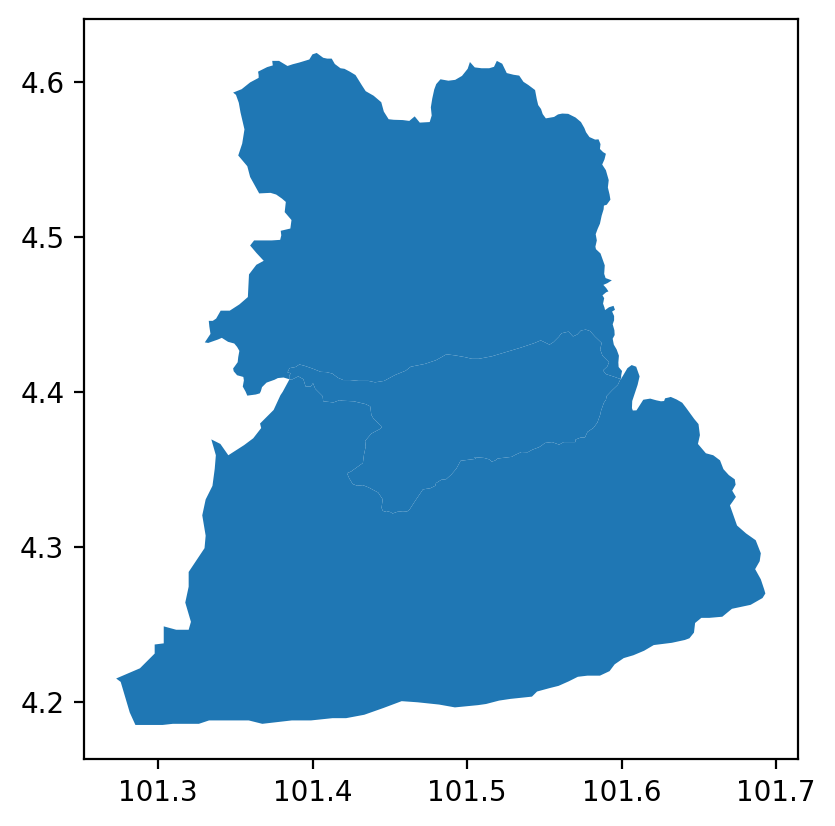

In [161]:
union=gpd.overlay(sa1,sa2,how='union')
union.plot()

In [162]:
union.head()

,desc_1,desc_2,geometry
0,Study_Area_1,Study_Area_2,"POLYGON ((101.44529 4.33050, 101.44236 4.33488..."
1,Study_Area_1,NaN,"POLYGON ((101.38479 4.40801, 101.38112 4.40910..."
2,NaN,Study_Area_2,"POLYGON ((101.38479 4.40801, 101.38626 4.40764..."


### Symetric difference of Polygons

<Axes: >

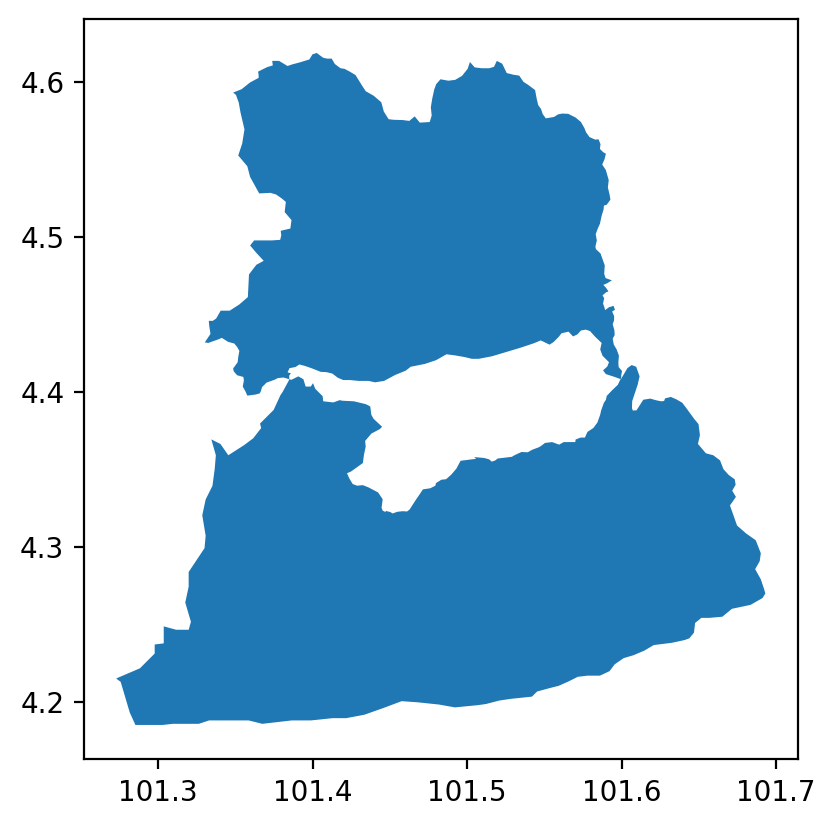

In [164]:
sd=gpd.overlay(sa1,sa2,how='symmetric_difference')
sd.plot()

### Difference of Polygons

<Axes: >

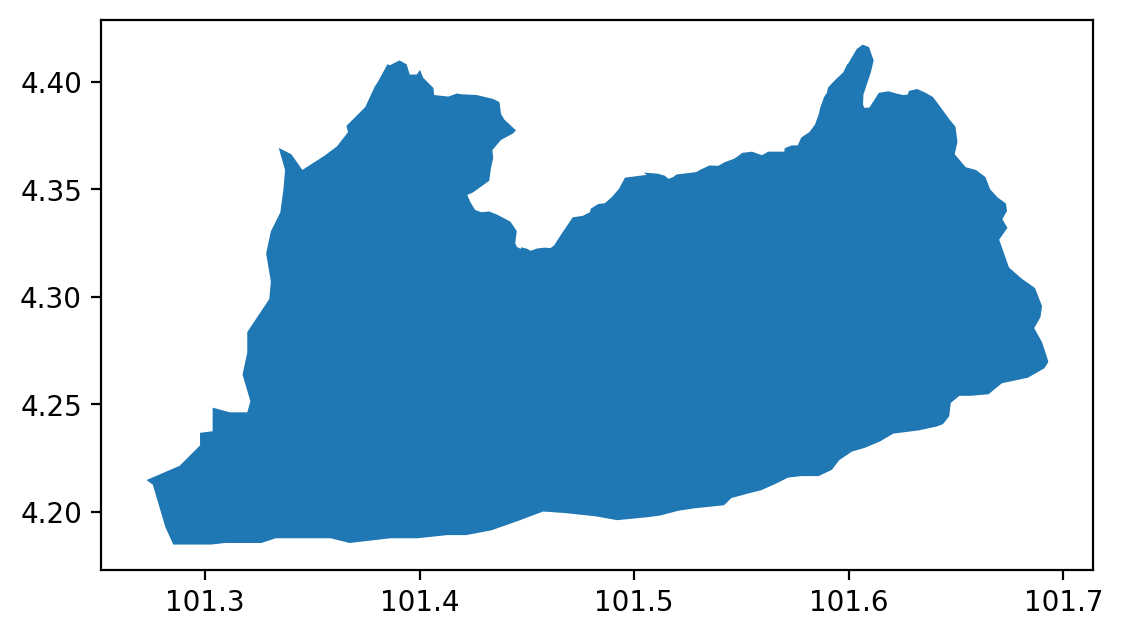

In [166]:
diff=gpd.overlay(sa2,sa1,how='difference')
diff.plot()

### Geoprocessing Operations- Dissolve a polygon

In [167]:
union['commoncol']=1

<Axes: >

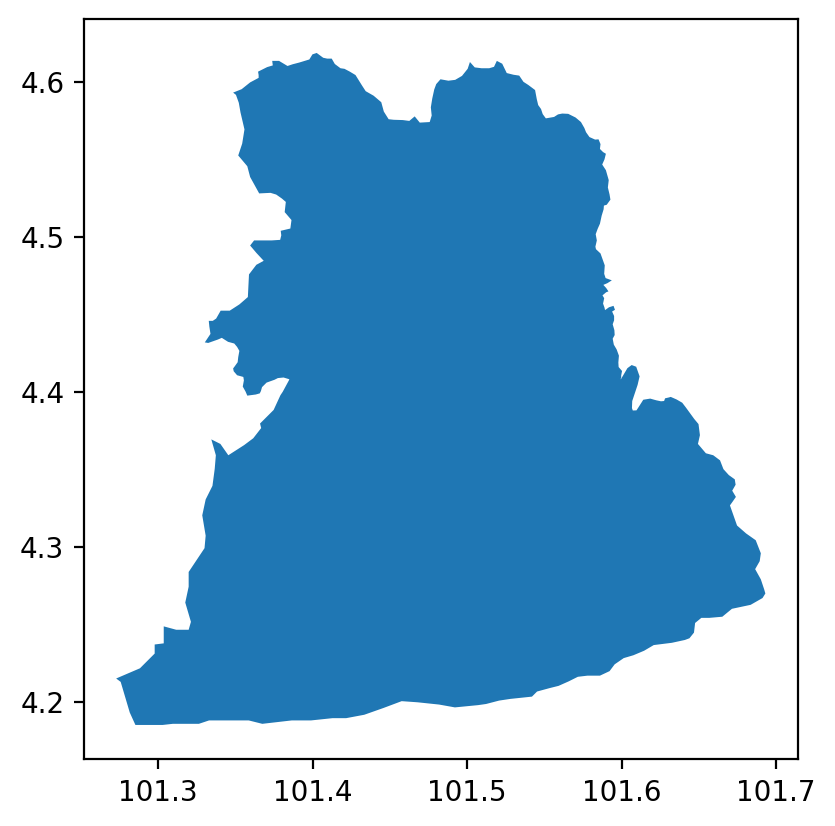

In [168]:
dissolvedSA=union.dissolve(by="commoncol")
dissolvedSA.plot()

In [169]:
dissolvedSA.head()

,geometry,desc_1,desc_2
commoncol,,,
1,"POLYGON ((101.59948 4.40801, 101.60370 4.41514...",Study_Area_1,Study_Area_2


### Creating a Buffer

In [170]:
river.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#changing the crs

In [171]:
river_proj=river.to_crs(epsg=24547)

In [172]:
buffer_500=river_proj['geometry'].buffer(distance=500)

<Axes: >

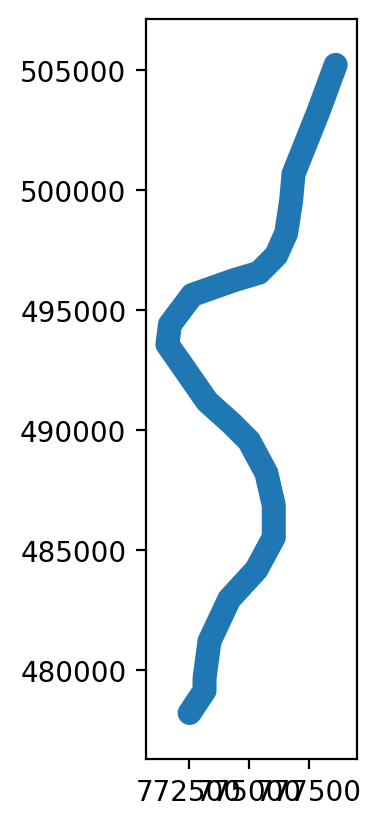

In [173]:
buffer_500.plot()

In [ ]:
### Centroids of Polygons

C:\Users\DELL\AppData\Local\Temp\ipykernel_21216\3680340833.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




<Axes: >

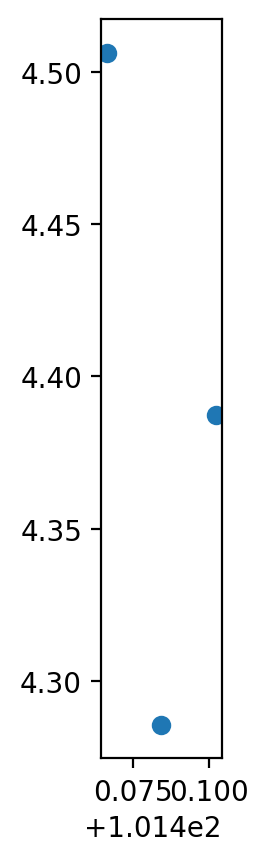

In [174]:
centroid=union['geometry'].centroid
centroid.plot()

<Axes: >

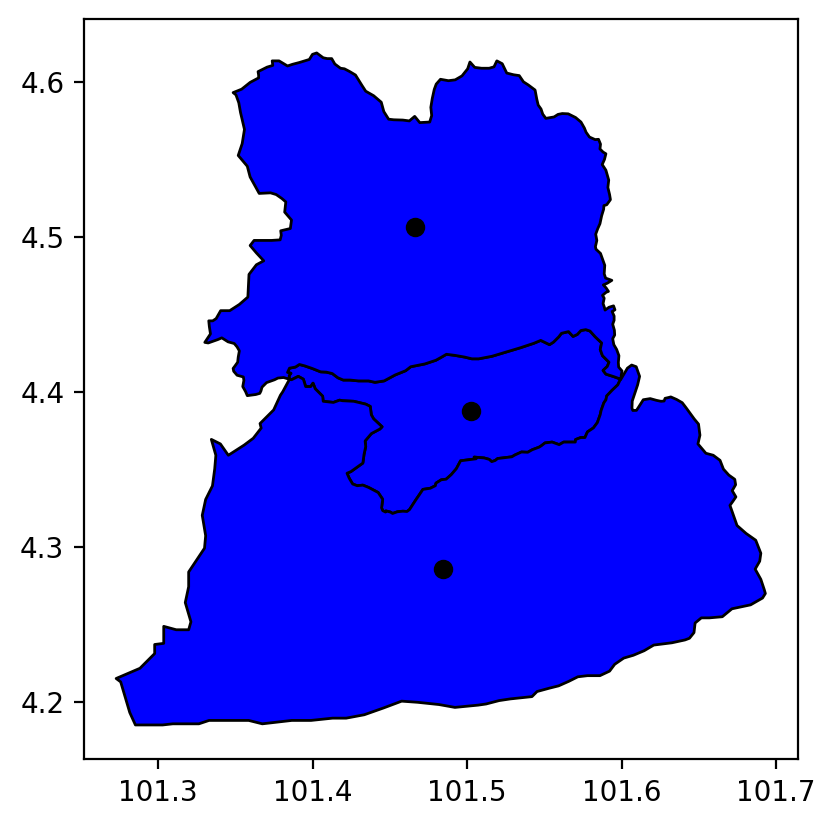

In [175]:
fig, ax =plt.subplots()
union.plot(ax=ax, color='blue',edgecolor='black')
centroid.plot(ax=ax,color='black',edgecolor='black')
